# Importações

In [224]:
import pandas as pd
import re

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import pickle

import warnings
warnings.filterwarnings('ignore')

# Análise Exploratória

Dados pego no [Kaggle](https://www.kaggle.com/datasets/jsonk11/social-media-advertising-dataset/data)

In [225]:
df = pd.read_csv('Social_Media_Advertising.csv')

In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Campaign_ID       300000 non-null  int64  
 1   Target_Audience   300000 non-null  object 
 2   Campaign_Goal     300000 non-null  object 
 3   Duration          300000 non-null  object 
 4   Channel_Used      300000 non-null  object 
 5   Conversion_Rate   300000 non-null  float64
 6   Acquisition_Cost  300000 non-null  object 
 7   ROI               300000 non-null  float64
 8   Location          300000 non-null  object 
 9   Language          300000 non-null  object 
 10  Clicks            300000 non-null  int64  
 11  Impressions       300000 non-null  int64  
 12  Engagement_Score  300000 non-null  int64  
 13  Customer_Segment  300000 non-null  object 
 14  Date              300000 non-null  object 
 15  Company           300000 non-null  object 
dtypes: float64(2), int64

In [227]:
df = df.dropna()

In [228]:
df.head()

,Campaign_ID,Target_Audience,Campaign_Goal,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date,Company
0,529013,Men 35-44,Product Launch,15 Days,Instagram,0.15,$500.00,5.790000,Las Vegas,Spanish,500,3000,7,Health,2022-02-25,Aura Align
1,275352,Women 45-60,Market Expansion,15 Days,Facebook,0.01,$500.00,7.210000,Los Angeles,French,500,3000,5,Home,2022-05-12,Hearth Harmony
2,692322,Men 45-60,Product Launch,15 Days,Instagram,0.08,$500.00,0.430000,Austin,Spanish,500,3000,9,Technology,2022-06-19,Cyber Circuit
3,675757,Men 25-34,Increase Sales,15 Days,Pinterest,0.03,$500.00,0.909824,Miami,Spanish,293,1937,1,Health,2022-09-08,Well Wish
4,535900,Men 45-60,Market Expansion,15 Days,Pinterest,0.13,$500.00,1.422828,Austin,French,293,1937,1,Home,2022-08-24,Hearth Harmony


In [229]:
df = df[df['Target_Audience'] != "All Ages"]

In [230]:
df[['Gender', 'Age_range']] = df['Target_Audience'].str.split(expand=True)
df[['Age_Min', 'Age_Max']] = df['Age_range'].str.split("-", expand=True)
df = df.drop('Age_range', axis=1)
df = df.drop('Target_Audience', axis=1)

## Visualização dos dados categóricos

In [231]:
df_non_numerics = df[["Gender", "Campaign_Goal", "Location", "Customer_Segment", "Channel_Used"]]

In [232]:
df_non_numerics.head()

,Gender,Campaign_Goal,Location,Customer_Segment,Channel_Used
0,Men,Product Launch,Las Vegas,Health,Instagram
1,Women,Market Expansion,Los Angeles,Home,Facebook
2,Men,Product Launch,Austin,Technology,Instagram
3,Men,Increase Sales,Miami,Health,Pinterest
4,Men,Market Expansion,Austin,Home,Pinterest


In [233]:
df_non_numerics.info()

<class 'pandas.core.frame.DataFrame'>
Index: 266553 entries, 0 to 299999
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Gender            266553 non-null  object
 1   Campaign_Goal     266553 non-null  object
 2   Location          266553 non-null  object
 3   Customer_Segment  266553 non-null  object
 4   Channel_Used      266553 non-null  object
dtypes: object(5)
memory usage: 12.2+ MB


### Gráficos de quantidade de incidências de cada váriavel em cada coluna

<Axes: xlabel='Gender', ylabel='percent'>

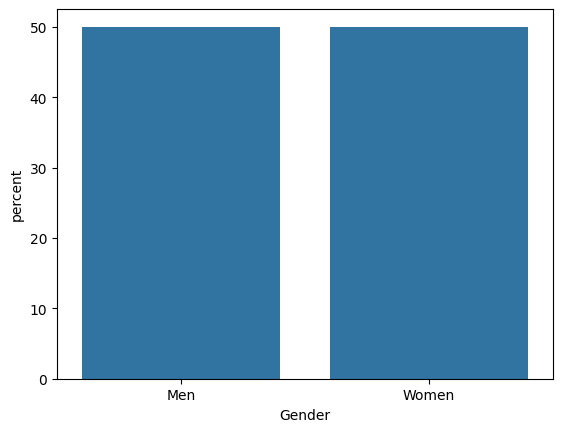

In [234]:
sns.countplot(data=df_non_numerics, x='Gender', stat='percent')

<Axes: xlabel='Campaign_Goal', ylabel='count'>

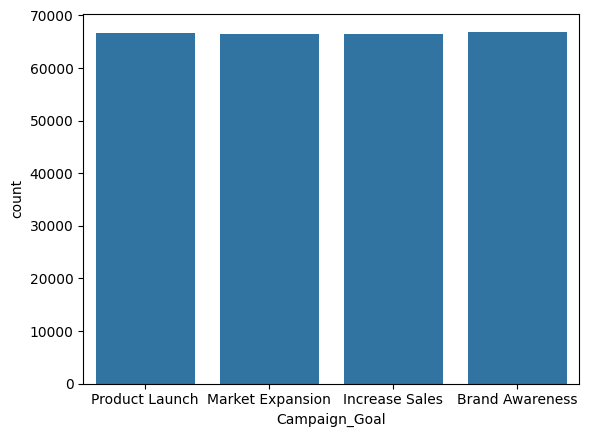

In [235]:
sns.countplot(data=df_non_numerics, x='Campaign_Goal')

<Axes: xlabel='Location', ylabel='count'>

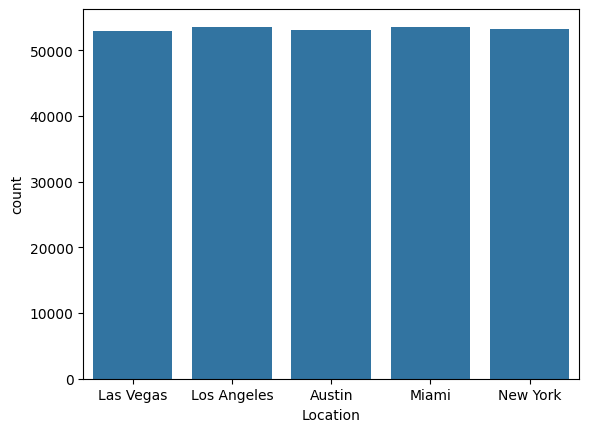

In [236]:
sns.countplot(data=df_non_numerics, x='Location')

<Axes: xlabel='Customer_Segment', ylabel='count'>

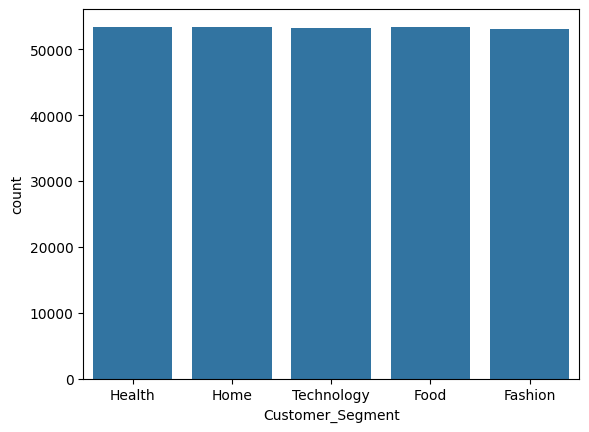

In [237]:
sns.countplot(data=df_non_numerics, x='Customer_Segment')

### Tabulação de incidências em cada rede social

In [238]:
pd.crosstab(df_non_numerics['Gender'], df['Channel_Used'])

Channel_Used,Facebook,Instagram,Pinterest,Twitter
Gender,,,,
Men,33195,33392,33553,33082
Women,33618,33329,33310,33074


In [239]:
pd.crosstab(df_non_numerics['Campaign_Goal'], df['Channel_Used'])

Channel_Used,Facebook,Instagram,Pinterest,Twitter
Campaign_Goal,,,,
Brand Awareness,16777,16702,16815,16644
Increase Sales,16576,16596,16651,16724
Market Expansion,16758,16678,16660,16374
Product Launch,16702,16745,16737,16414


In [240]:
pd.crosstab(df_non_numerics['Location'], df['Channel_Used'])

Channel_Used,Facebook,Instagram,Pinterest,Twitter
Location,,,,
Austin,13288,13400,13454,13019
Las Vegas,13324,13147,13252,13279
Los Angeles,13319,13364,13459,13456
Miami,13484,13380,13491,13230
New York,13398,13430,13207,13172


In [241]:
pd.crosstab(df_non_numerics['Customer_Segment'], df['Channel_Used'])

Channel_Used,Facebook,Instagram,Pinterest,Twitter
Customer_Segment,,,,
Fashion,13397,13339,13335,13041
Food,13205,13335,13502,13359
Health,13297,13492,13242,13360
Home,13391,13225,13586,13216
Technology,13523,13330,13198,13180


## Visualização dos dados númericos

In [242]:
df_numerics = df[["Duration", "Conversion_Rate", "Acquisition_Cost", "ROI", "Clicks", "Impressions", "Engagement_Score", "Age_Min", "Age_Max", "Channel_Used"]]

In [243]:
df_numerics.head()

,Duration,Conversion_Rate,Acquisition_Cost,ROI,Clicks,Impressions,Engagement_Score,Age_Min,Age_Max,Channel_Used
0,15 Days,0.15,$500.00,5.790000,500,3000,7,35,44,Instagram
1,15 Days,0.01,$500.00,7.210000,500,3000,5,45,60,Facebook
2,15 Days,0.08,$500.00,0.430000,500,3000,9,45,60,Instagram
3,15 Days,0.03,$500.00,0.909824,293,1937,1,25,34,Pinterest
4,15 Days,0.13,$500.00,1.422828,293,1937,1,45,60,Pinterest


In [244]:
df_numerics.info()

<class 'pandas.core.frame.DataFrame'>
Index: 266553 entries, 0 to 299999
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Duration          266553 non-null  object 
 1   Conversion_Rate   266553 non-null  float64
 2   Acquisition_Cost  266553 non-null  object 
 3   ROI               266553 non-null  float64
 4   Clicks            266553 non-null  int64  
 5   Impressions       266553 non-null  int64  
 6   Engagement_Score  266553 non-null  int64  
 7   Age_Min           266553 non-null  object 
 8   Age_Max           266553 non-null  object 
 9   Channel_Used      266553 non-null  object 
dtypes: float64(2), int64(3), object(5)
memory usage: 22.4+ MB


In [245]:
def to_int(string):
    numeros = re.findall(r'\d+', string)
    return int(numeros[0]) if numeros else 0

In [246]:
def to_float(string):
    numeros = re.findall(r'\d+', string)
    return round(float(numeros[0]), 2) if numeros else 0

In [247]:
df_numerics['Duration'] = df_numerics['Duration'].apply(to_int)
df_numerics['Age_Min'] = df_numerics['Age_Min'].apply(to_int)
df_numerics['Age_Max'] = df_numerics['Age_Max'].apply(to_int)

In [248]:
df_numerics['Acquisition_Cost'] = df_numerics['Acquisition_Cost'].apply(to_float)

In [249]:
df_numerics.head()

,Duration,Conversion_Rate,Acquisition_Cost,ROI,Clicks,Impressions,Engagement_Score,Age_Min,Age_Max,Channel_Used
0,15,0.15,500.0,5.790000,500,3000,7,35,44,Instagram
1,15,0.01,500.0,7.210000,500,3000,5,45,60,Facebook
2,15,0.08,500.0,0.430000,500,3000,9,45,60,Instagram
3,15,0.03,500.0,0.909824,293,1937,1,25,34,Pinterest
4,15,0.13,500.0,1.422828,293,1937,1,45,60,Pinterest


#### Gráficos de distribuição

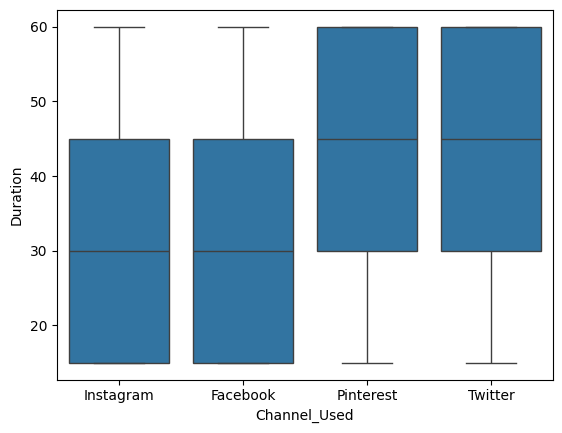

In [250]:
sns.boxplot(data=df_numerics, x='Channel_Used', y='Duration')
plt.show()

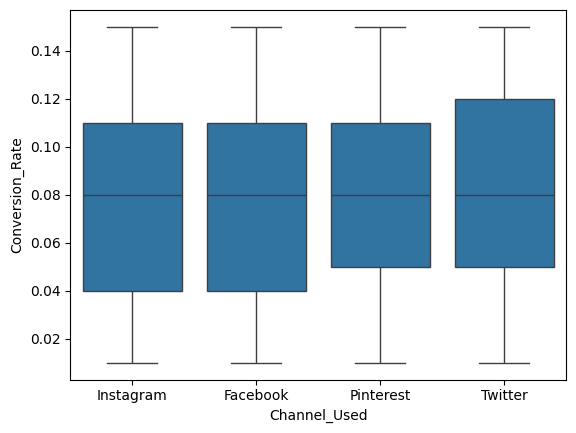

In [251]:
sns.boxplot(data=df_numerics, x='Channel_Used', y='Conversion_Rate')
plt.show()

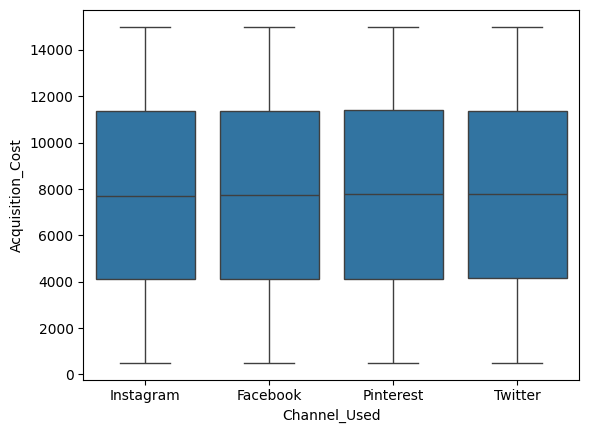

In [252]:
sns.boxplot(data=df_numerics, x='Channel_Used', y='Acquisition_Cost')
plt.show()

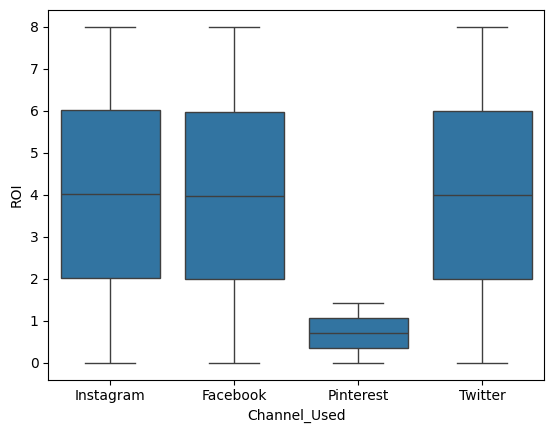

In [253]:
sns.boxplot(data=df_numerics, x='Channel_Used', y='ROI')
plt.show()

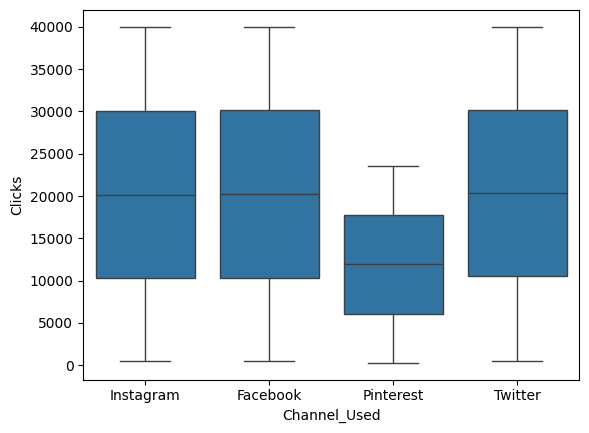

In [254]:
sns.boxplot(data=df_numerics, x='Channel_Used', y='Clicks')
plt.show()

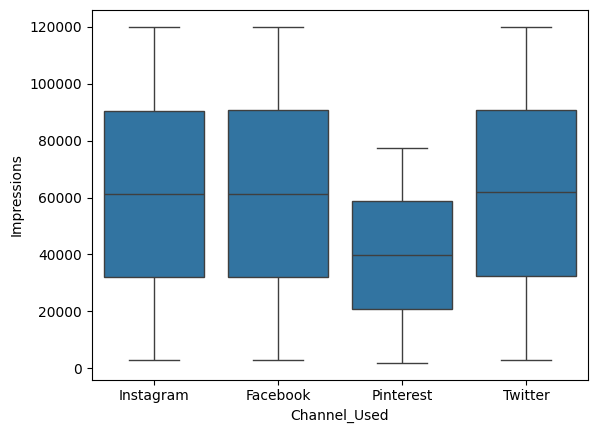

In [255]:
sns.boxplot(data=df_numerics, x='Channel_Used', y='Impressions')
plt.show()

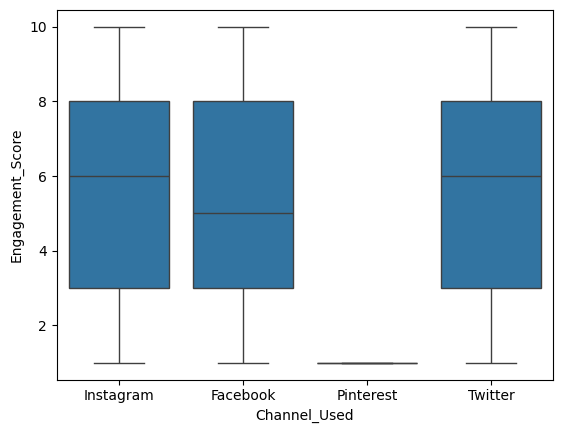

In [256]:
sns.boxplot(data=df_numerics, x='Channel_Used', y='Engagement_Score')
plt.show()

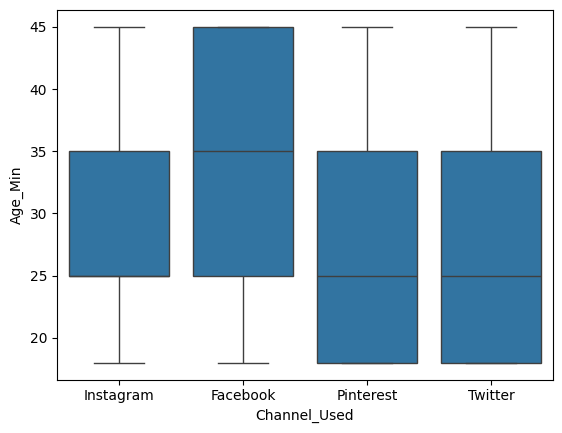

In [257]:
sns.boxplot(data=df_numerics, x='Channel_Used', y='Age_Min')
plt.show()

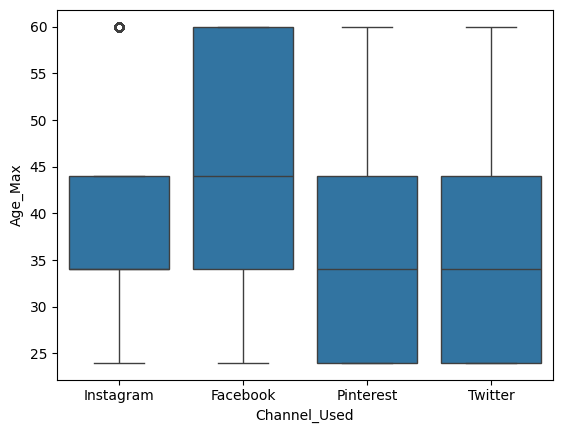

In [258]:
sns.boxplot(data=df_numerics, x='Channel_Used', y='Age_Max') # Analizar outliers baseado com IQR
plt.show()

# Pré-Processamento dos dados

In [259]:
df = df.drop(columns=['Date', 'Company', 'Campaign_ID'])

In [260]:
df = df[df['Channel_Used'] != "Pinterest"]

In [261]:
df['Duration'] = df['Duration'].apply(to_int)
df['Age_Min'] = df['Age_Min'].apply(to_int)
df['Age_Max'] = df['Age_Max'].apply(to_int)

In [262]:
df['Acquisition_Cost'] = df['Acquisition_Cost'].apply(to_float)

In [263]:
le = LabelEncoder()

In [264]:
df['Channel_Used'] = le.fit_transform(df['Channel_Used'])

In [265]:
gender_dummies = pd.get_dummies(df['Gender'], dtype=int)
campaign_dummies = pd.get_dummies(df['Campaign_Goal'], dtype=int)
location_dummies = pd.get_dummies(df['Location'], dtype=int)
segment_dummies = pd.get_dummies(df['Customer_Segment'], dtype=int)
language_dummies = pd.get_dummies(df['Language'], dtype=int)

In [266]:
df = pd.concat([df, gender_dummies], axis=1)
df = pd.concat([df, campaign_dummies], axis=1)
df = pd.concat([df, location_dummies], axis=1)
df = pd.concat([df, segment_dummies], axis=1)
df = pd.concat([df, language_dummies], axis=1)

In [267]:
df = df.drop('Gender', axis=1)
df = df.drop('Campaign_Goal', axis=1)
df = df.drop('Location', axis=1)
df = df.drop('Customer_Segment', axis=1)
df = df.drop('Language', axis=1)

In [268]:
df.head()

,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Clicks,Impressions,Engagement_Score,Age_Min,Age_Max,...,Miami,New York,Fashion,Food,Health,Home,Technology,English,French,Spanish
0,15,1,0.15,500.0,5.79,500,3000,7,35,44,...,0,0,0,0,1,0,0,0,0,1
1,15,0,0.01,500.0,7.21,500,3000,5,45,60,...,0,0,0,0,0,1,0,0,1,0
2,15,1,0.08,500.0,0.43,500,3000,9,45,60,...,0,0,0,0,0,0,1,0,0,1
5,15,0,0.02,500.0,6.90,500,3001,10,35,44,...,0,0,0,0,0,0,1,0,0,1
8,15,2,0.14,500.0,1.19,501,3003,8,35,44,...,0,0,0,1,0,0,0,0,1,0


# Treinamento do modelo

## Separação dos dados de treinamento

In [269]:
X = df.drop('Channel_Used', axis=1)

In [270]:
y = df['Channel_Used']

In [271]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=14)

In [272]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149767 entries, 120086 to 176227
Data columns (total 28 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Duration          149767 non-null  int64  
 1   Conversion_Rate   149767 non-null  float64
 2   Acquisition_Cost  149767 non-null  float64
 3   ROI               149767 non-null  float64
 4   Clicks            149767 non-null  int64  
 5   Impressions       149767 non-null  int64  
 6   Engagement_Score  149767 non-null  int64  
 7   Age_Min           149767 non-null  int64  
 8   Age_Max           149767 non-null  int64  
 9   Men               149767 non-null  int64  
 10  Women             149767 non-null  int64  
 11  Brand Awareness   149767 non-null  int64  
 12  Increase Sales    149767 non-null  int64  
 13  Market Expansion  149767 non-null  int64  
 14  Product Launch    149767 non-null  int64  
 15  Austin            149767 non-null  int64  
 16  Las Vegas         14

## Treinando o modelo com o algorito RandomForest

In [273]:
rfc = RandomForestClassifier()

In [274]:
model_trained = rfc.fit(X_train, y_train)

In [275]:
y_pred_rfc = rfc.predict(X_test)
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.33      0.35      0.34     16650
           1       0.34      0.34      0.34     16585
           2       0.34      0.31      0.32     16688

    accuracy                           0.34     49923
   macro avg       0.34      0.34      0.33     49923
weighted avg       0.34      0.34      0.33     49923



# Importação do modelo

In [276]:
with open('VOM-HIVE-AI-MODEL.pkl', 'wb') as f:
    pickle.dump(model_trained, f)